In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers



In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 49s 0us/step


In [3]:
img_count = len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


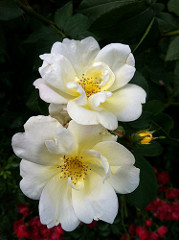

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))


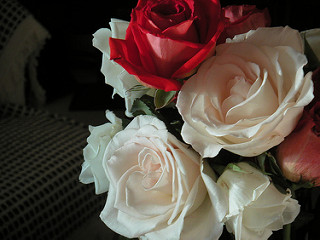

In [5]:
PIL.Image.open(str(roses[1]))

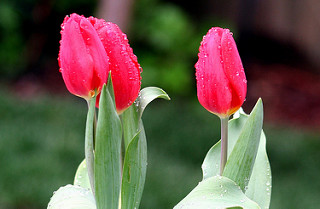

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

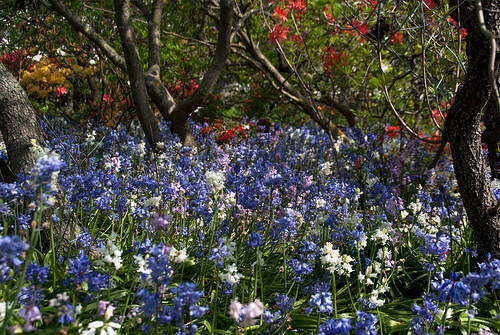

In [7]:
PIL.Image.open(str(tulips[1]))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
#validation split

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation",seed=123,image_size=(img_height,img_width), batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


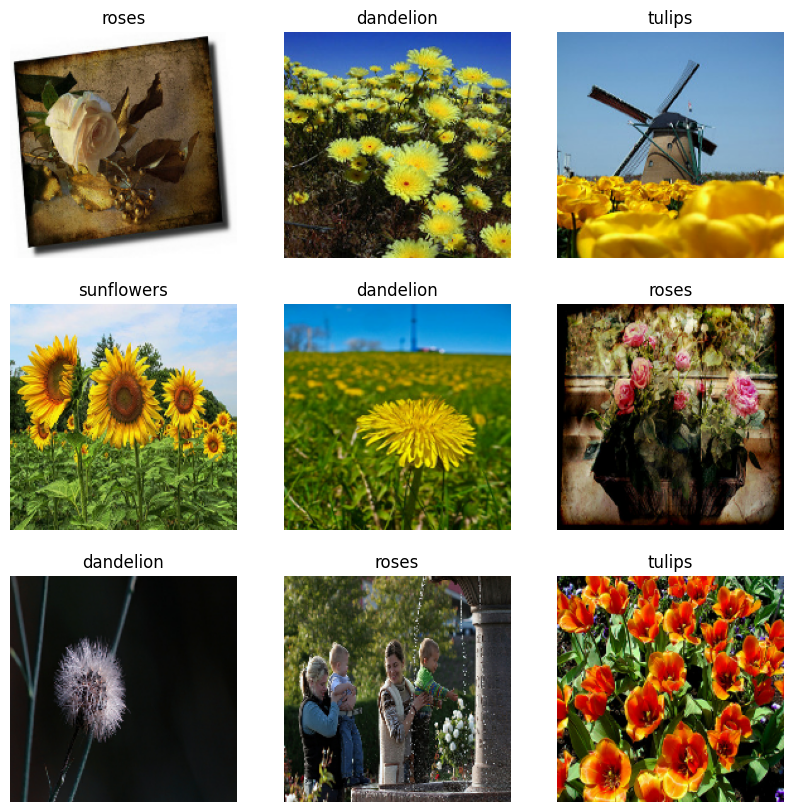

In [12]:
from matplotlib.pyplot import subplot


plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
hold_image = image_batch.numpy()
hold_label = labels_batch.numpy()
print(hold_image)
print(hold_label) 

(32, 180, 180, 3)
(32,)
[[[[8.83888855e+01 1.24388885e+02 2.00388885e+02]
   [8.89277802e+01 1.24927780e+02 2.00927780e+02]
   [8.88342590e+01 1.25369446e+02 1.99212967e+02]
   ...
   [2.14580017e+02 8.65392227e+01 2.93608099e-01]
   [2.33405533e+02 1.02674973e+02 5.17222071e+00]
   [2.28703690e+02 9.76851730e+01 2.50831127e+00]]

  [[9.02777786e+01 1.26277779e+02 2.02277786e+02]
   [9.08666611e+01 1.27150002e+02 2.03008331e+02]
   [9.50527802e+01 1.33036102e+02 2.06155548e+02]
   ...
   [1.61444641e+02 6.94110336e+01 9.16383362e+00]
   [1.72708313e+02 6.47249908e+01 1.37494326e+00]
   [1.53869415e+02 6.37055588e+01 4.15557909e+00]]

  [[9.30277786e+01 1.31027786e+02 2.06027786e+02]
   [9.27500000e+01 1.30819443e+02 2.05819443e+02]
   [9.83518524e+01 1.37162033e+02 2.09879623e+02]
   ...
   [1.18514069e+02 5.96759567e+01 8.26373959e+00]
   [1.67694916e+02 1.02569954e+02 4.29171982e+01]
   [2.26222305e+02 1.90916809e+02 1.68245605e+02]]

  ...

  [[8.00000458e+01 1.02430565e+02 3.508800

In [14]:
#pre-processing
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

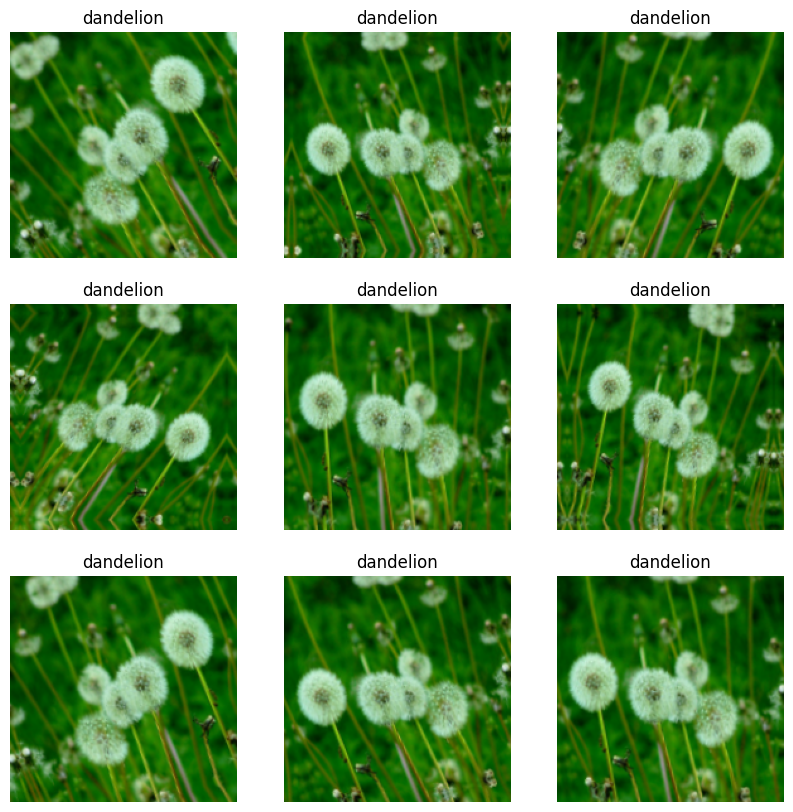

In [15]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    first_image = images[0]
    for i in range(9):
        
        ax = subplot(3, 3, i+1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

In [16]:
num_classes = len(class_names)
InceptionV3 = tf.keras.applications.InceptionV3(
    weights="imagenet",
    input_shape=(180, 180, 3),
    include_top=False,
    
)

for layer in InceptionV3.layers:
    layer.trainable = False

x = InceptionV3.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=InceptionV3.input, outputs=preds)

model.summary()

87910968/87910968 [==============================] - 19s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                            

In [17]:
#for layers in model.layers:
#    layers.trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [18]:
model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.Adam(learning_rate=.0001),
            #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)

epochs = 20
result = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
92/92 [==============================] - 66s 673ms/step - loss: 26.4654 - accuracy: 0.3076 - val_loss: 2.2677 - val_accuracy: 0.3229
Epoch 2/20
92/92 [==============================] - 59s 646ms/step - loss: 1.5360 - accuracy: 0.3764 - val_loss: 1.5733 - val_accuracy: 0.3651
Epoch 3/20
92/92 [==============================] - 61s 662ms/step - loss: 1.3882 - accuracy: 0.4142 - val_loss: 1.5113 - val_accuracy: 0.3842
Epoch 4/20
92/92 [==============================] - 61s 662ms/step - loss: 1.3039 - accuracy: 0.4615 - val_loss: 1.4819 - val_accuracy: 0.4019
Epoch 5/20
92/92 [==============================] - 62s 669ms/step - loss: 1.2308 - accuracy: 0.4949 - val_loss: 1.5386 - val_accuracy: 0.4183
Epoch 6/20
92/92 [==============================] - 61s 659ms/step - loss: 1.2186 - accuracy: 0.4980 - val_loss: 1.4657 - val_accuracy: 0.4169
Epoch 7/20
92/92 [==============================] - 61s 664ms/step - loss: 1.1880 - accuracy: 0.5034 - val_loss: 1.5097 - val_accuracy: 0.437

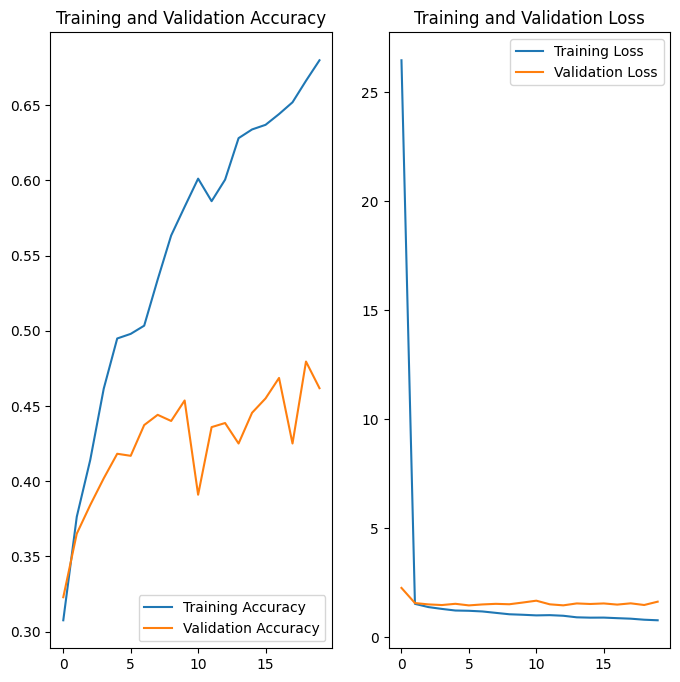

In [19]:
accuracy = result.history["accuracy"]
val_accuracy = result.history["val_accuracy"]

loss = result.history["loss"]
val_loss = result.history["val_loss"]

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"

#sunflower_path = tf.keras.utils.get_file('sunflower-1627193_1280', origin="C:/Users/joshu/Downloads/sunflower-1627193_1280.jpg")

img = tf.keras.utils.load_img(
    "C:/Users/joshua/Downloads/sunflower-1627193_1280.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
pred = np.argmax(predictions, axis=-1)
print(class_names[pred[0]])
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 3s 3s/step
sunflowers
[[1.8525276e-03 9.2478312e-04 2.9210518e-03 9.8968530e-01 4.6164538e-03]]
tf.Tensor([0.14951442 0.14937578 0.14967428 0.4015073  0.14992824], shape=(5,), dtype=float32)
This image most likely belongs to sunflowers with a 40.15 percent confidence.
